## ✅ تعریف

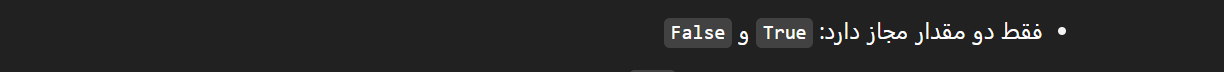

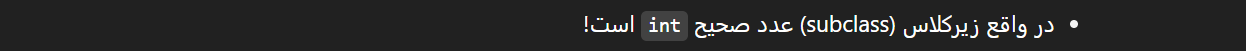

In [ ]:
isinstance(False,int)

True

## ✅ رفتار

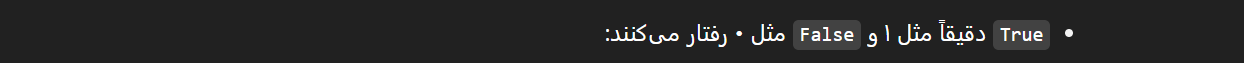


In [ ]:
print(True + True)   # 2
print(False + 10)    # 10
print(True * 5)      # 5
print(False * 100)   # 0


2
10
5
0


## ✅ casting to bool

In [ ]:
print(bool(0), bool(""), bool(()), bool([]), bool(None))
print(bool(1), bool('a'), bool([0]))

False False False False False
True True True


## ✅ چطور عمل می‌کند؟

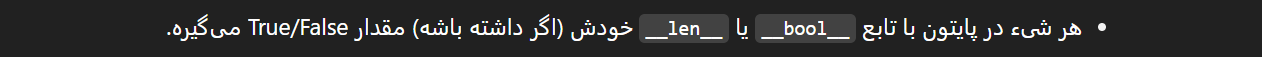

## 🎯__bool__ با custom ساخت کلاس‌های

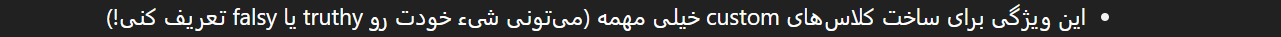

### ✅ مثال پیشرفته

In [ ]:
class MyList():
  def __init__(self, items):
    self.items = items
  def __bool__(self):
    return len(self.items) > 5

ml = MyList([1,2,3,4,5])
print(bool(ml))
ml.items.append(2)
print(bool(ml))


False
True


## ✅ در حافظه

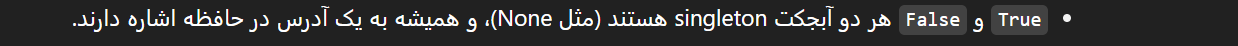

In [ ]:
import sys
print(sys.getsizeof(True))
print(sys.getsizeof(False))
print(sys.getsizeof(0))
print(sys.getsizeof(1))
print(id(False))
print(id(True))

28
28
28
28
9623328
9696896


### 🎯Singleton  تعریف  آبجکت

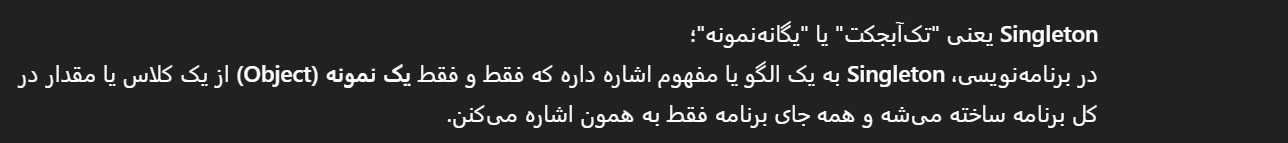

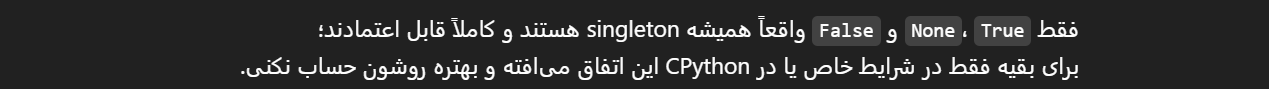

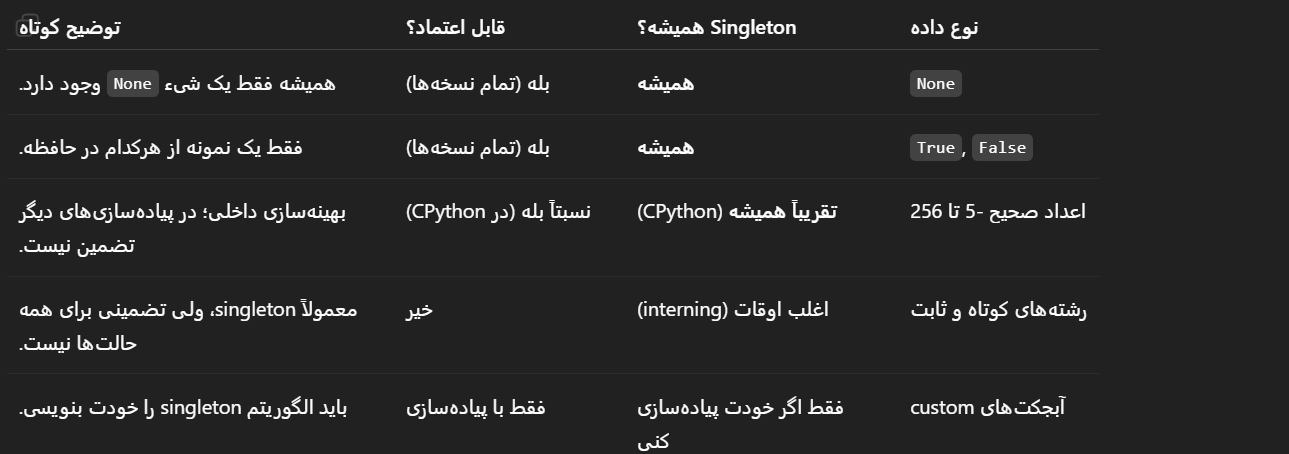

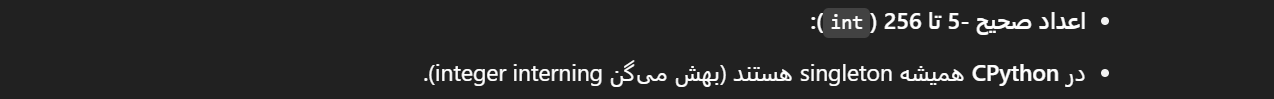

### 🎯 reference count

In [ ]:
import sys
print(sys.getrefcount(True))

x = True
print(sys.getrefcount(True))   # مثلا 211
del x
print(sys.getrefcount(True))   # برمی‌گرده به 210


30952
30955
30954


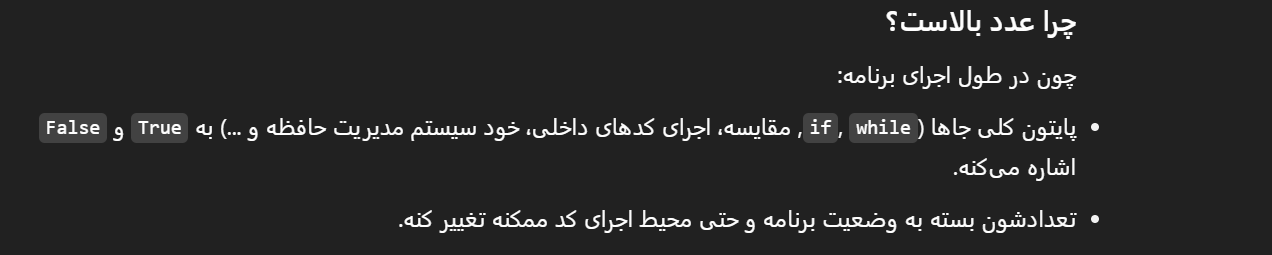

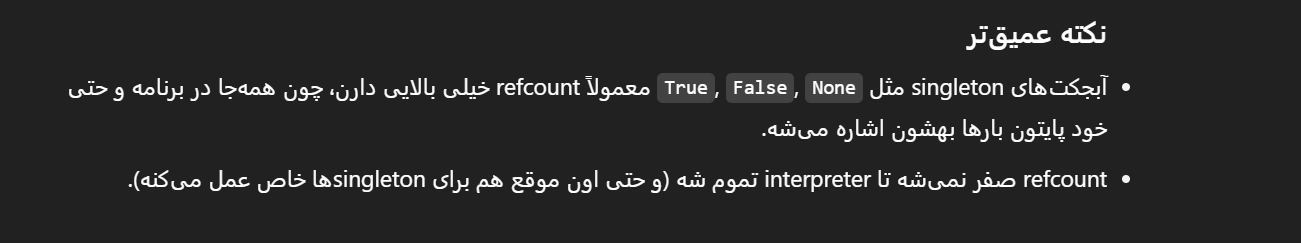

 ### 🎯 راه تشخیص

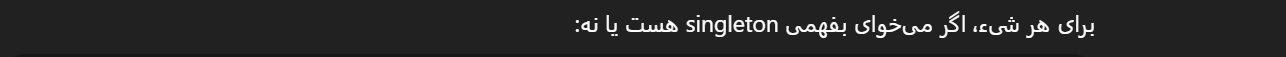




```
a = ...
b = ...
print(a is b)  # True ==> singleton یا interned

```



### ✅ در پایتون singleton ساخت یک کلاس  

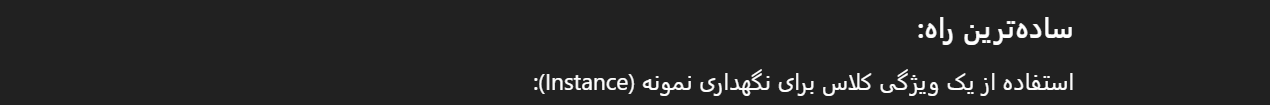

In [ ]:
class s():
  _instance = None # ویژگی کلاس برای نگهداری آبجکت
  def __new__(cls, *args, **kwargs):
    if cls._instance is None:
      cls._instance = super().__new__(cls)
    return cls._instance

a = s()
b = s()
print(a is b)

True


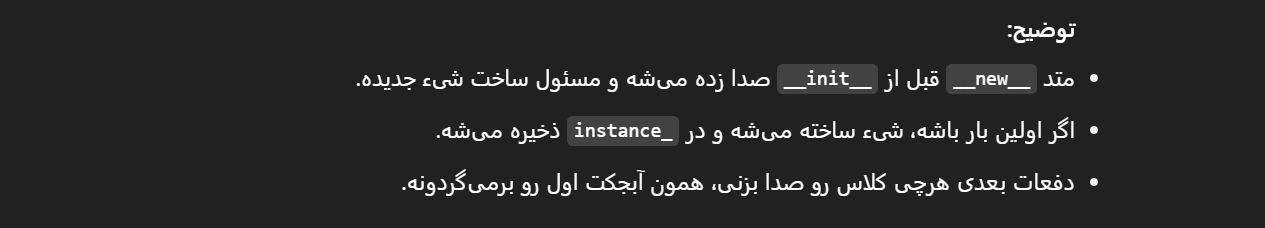

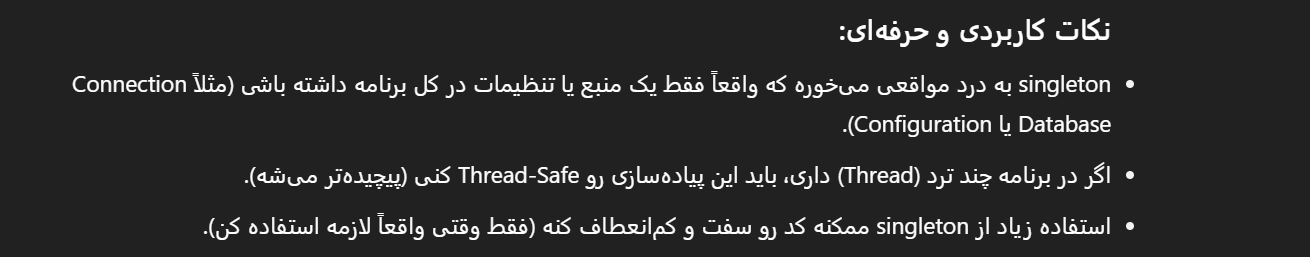

## ✅ عملگرهای منطقی

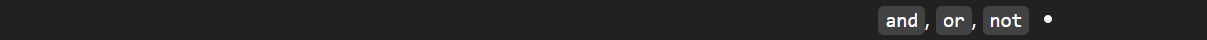

### lazy evaluation

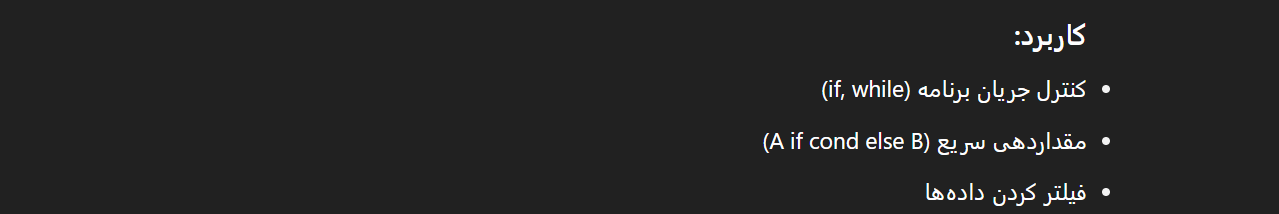

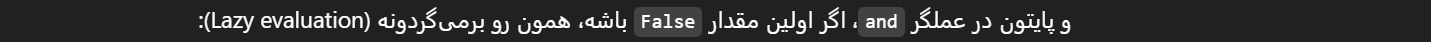

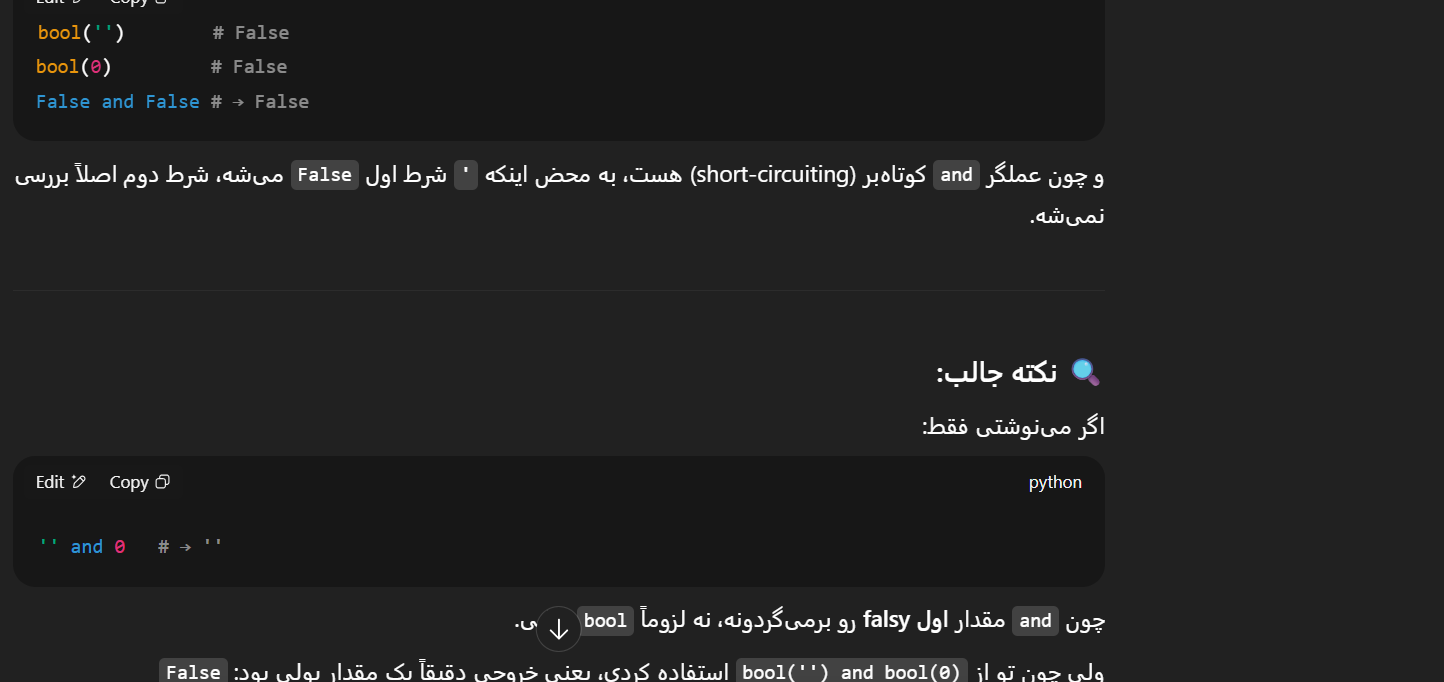

### ✅ تفاوت and و &

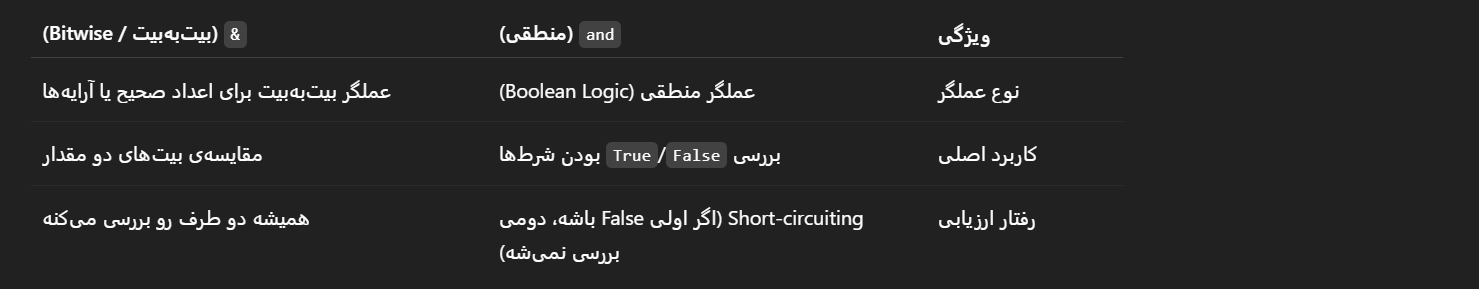

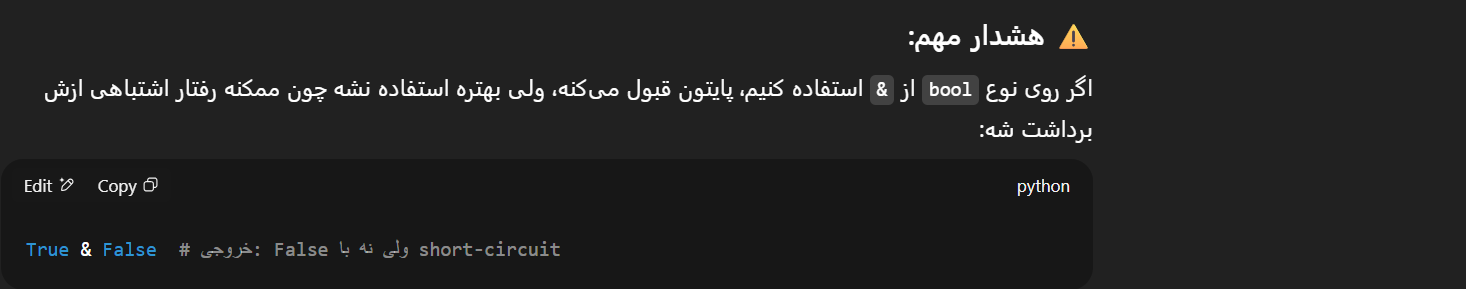

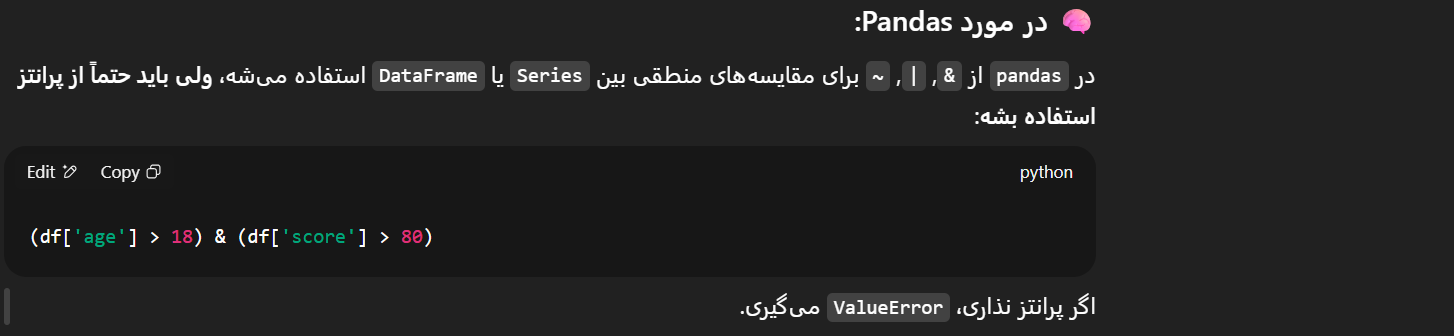

## 🎯 تمرین

### 🎯 تمرین 1

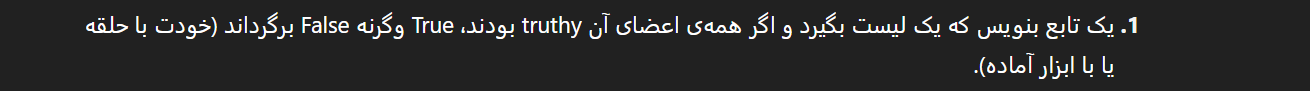

In [ ]:
def my_list_validator(l: list) -> bool:
  for el in l:
    if el:
      continue
    return False
  return True

# testing
a = list("abcde")
print(my_list_validator(a))

a.append("")
print(my_list_validator(a))

True
False


#### (کد کوتاه‌تر یا پایتونیک‌تر) راه حل‌های جایگزین  

##### built-in all  روش ۱: استفاده از تابع

In [ ]:
def my_list_validator(l: list) -> bool:
  return all(l)

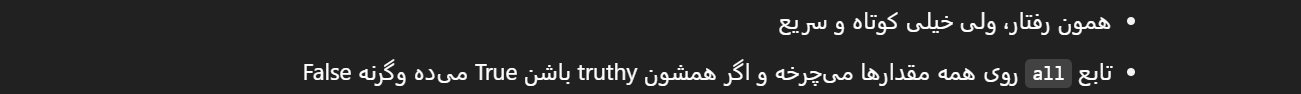

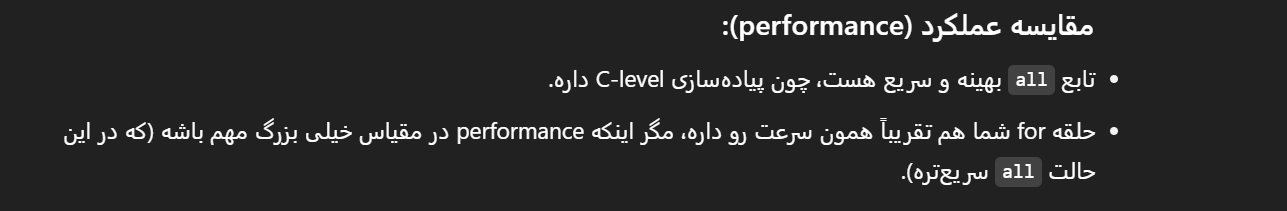

##### (عمومی‌تر) iterable روش ۲: استفاده از هر نوع  

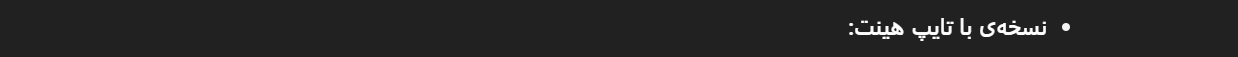

In [ ]:
from typing import Iterable

def my_list_validator(col:Iterable)->bool:
  return all(col)

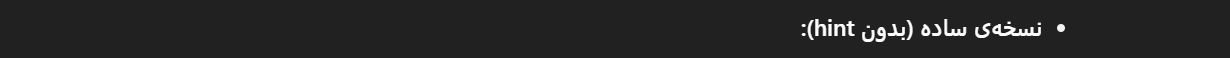

In [ ]:
def my_list_validator(col):
  return all(col)

### 🎯 تمرین 2

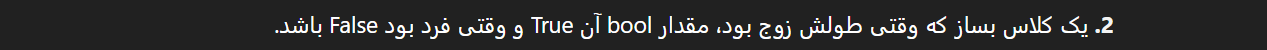

In [ ]:
class MyEvenValidator():
  def __init__(self, collezione):
    self.collezione = collezione
  def __bool__(self):
    return not len(self.collezione) % 2

a = MyEvenValidator("abcd")
print(bool(a))
b = MyEvenValidator[1,2,3])
print(bool(b))

True
False


#### و بهبودهای جزئی type hinting نسخه‌ی پیشنهادی با

(PEP 8) برای رعایت نکات پیشرفته‌تر و استاندارد پایتون

In [ ]:
from typing import Sized

class MyEvenValidator:
    def __init__( self, collection: Sized):
        self.collection = collection

    def __bool__(self) -> bool:
        return len(self.collection) % 2 == 0

# تست
a = MyEvenValidator("abcd")
print(bool(a))  # True

b = MyEvenValidator([1, 2, 3])
print(bool(b))  # False


 #### 🎯Sized و Iterable تفاوت

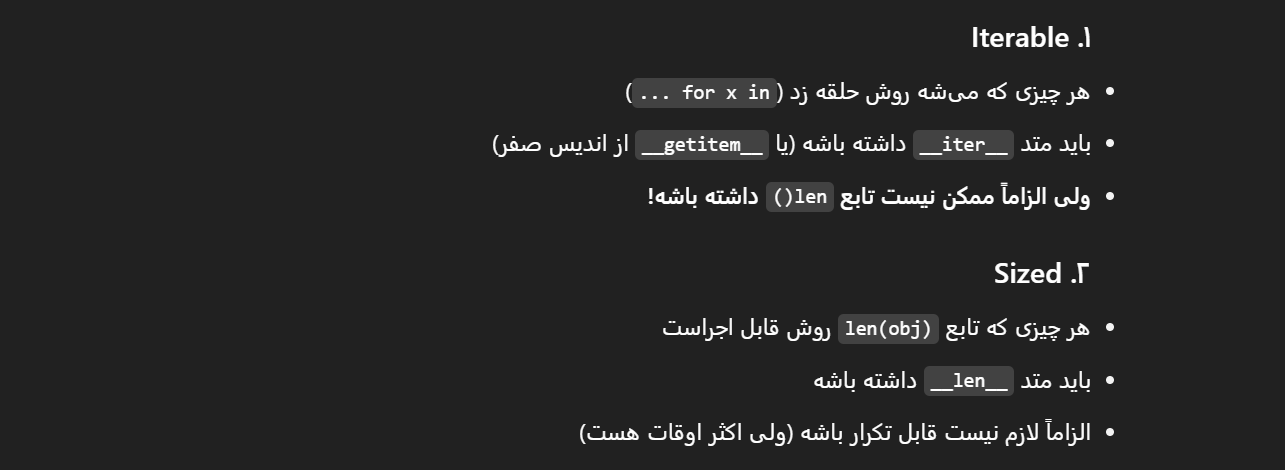

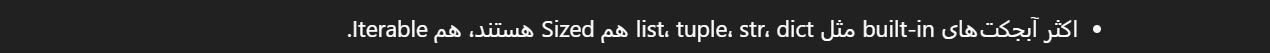

##### ۱. نداره len که Iterable   

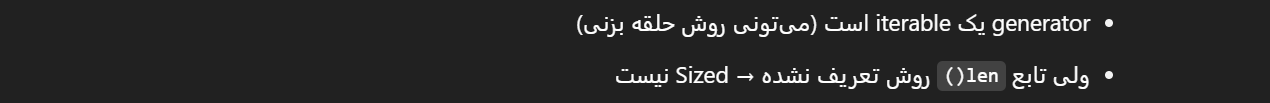

In [ ]:
g = (i for i in range(5))  # این یک generator expression هست
print(iter(g))    # خروجی: <generator object ...>
# حلقه زدن ممکنه
for i in g:
    print(i)      # 0, 1, 2, 3, 4
# ولی:
print(len(g))     # خطا: object of type 'generator' has no len()


<generator object <genexpr> at 0x7983a2344ba0>
0
1
2
3
4


TypeError: object of type 'generator' has no len()

#####  ۲. نیست iterable که Sized  

In [ ]:
class StrangeClass:
  def __len__(self):
    return 42
a = StrangeClass()
print(len(a))
print(iter(a))       # 'StrangeClass' object is not iterable

# or
# for x in a:
#     print(x)       # 'StrangeClass' object is not iterable

42


TypeError: 'StrangeClass' object is not iterable